a,b,c= [-0.0814176   1.48205597 -0.45093064]
d= 85.18515516209678
train accuracy= 0.8071442709273492


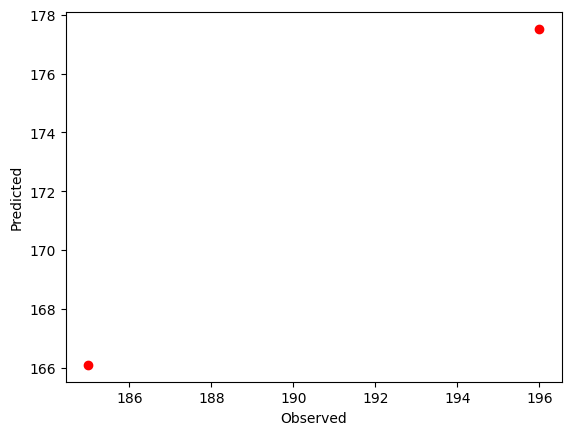

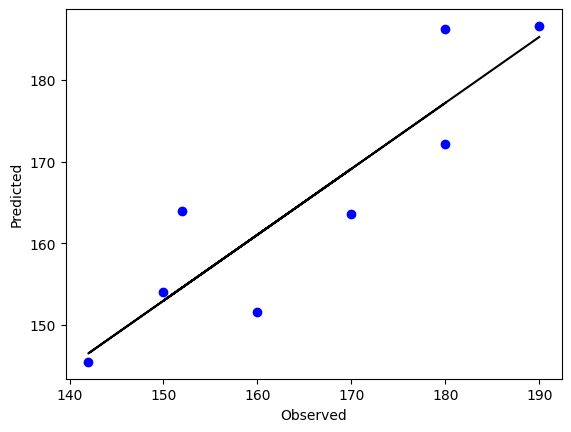

In [1]:
# Lab 4 Multi-variable linear regression
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

x1_data = [73., 93., 89., 96., 73., 40., 50., 60., 70., 80.]
x2_data = [80., 88., 91., 98., 66., 70., 80., 90., 70., 100.]
x3_data = [75., 93., 90., 100., 70., 70., 80., 60., 70., 90.]

y_data = [152., 185., 180., 196., 142., 150., 170., 190., 160., 180.]

x1_data = np.array(x1_data)
x2_data = np.array(x2_data)
x3_data = np.array(x3_data)

x = np.hstack((x1_data.reshape(-1,1), x2_data.reshape(-1,1), x3_data.reshape(-1,1)))
y = np.array(y_data)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

mlr = LinearRegression()
mlr.fit(x_train, y_train)
# y = a*x1 + b*x2 + c*x3 + d

print("a,b,c=", mlr.coef_)
print("d=",mlr.intercept_)
print("train accuracy=",mlr.score(x_train,y_train))

y_predict = mlr.predict(x_test)

mlr.score(x_test, y_test)

plt.figure(1)
plt.plot(y_test, y_predict, 'ro')

plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.show()


y_predict = mlr.predict(x_train)
line_fitter = LinearRegression()
line_fitter.fit(y_train.reshape(-1,1), y_predict)

plt.figure(2)
plt.plot(y_train, mlr.predict(x_train), 'bo')
plt.plot(y_train, line_fitter.predict(y_train.reshape(-1,1)), 'k-')
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.show()



In [24]:
# Lab 4 Multi-variable linear regression
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]

tf.model = tf.keras.Sequential()

tf.model.add(tf.keras.layers.Dense(units=1, input_dim=3))  # input_dim=3 gives multi-variable regression
tf.model.add(tf.keras.layers.Activation('linear'))  # this line can be omitted, as linear activation is default
# advanced reading https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

tf.model.compile(loss='mae', optimizer=tf.keras.optimizers.SGD(lr=1e-7))
tf.model.summary()
history = tf.model.fit(x_data, y_data, epochs=100, batch_size=1, verbose=1)

y_predict = tf.model.predict(x_data)
print(y_predict)


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1)                 4         
                                                                 
 activation_19 (Activation)  (None, 1)                 0         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 106.9208
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 117.6608
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 108.3050
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 115.5379
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 101.0459
Epoch 6/100
5/5 [

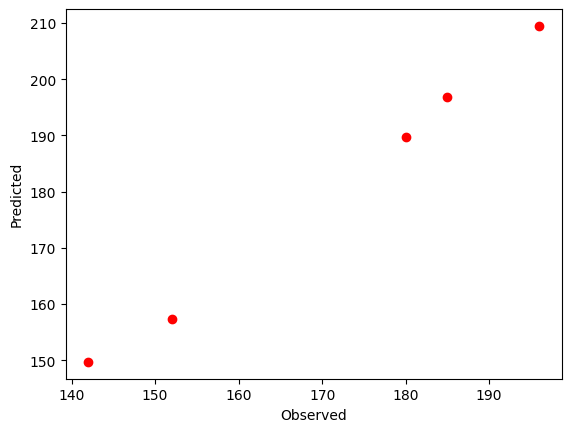

In [23]:
plt.figure(1)
plt.plot(y_data, y_predict, 'ro')

plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.show()